In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings as warning
warning.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file (adjust if needed)
file_path = '/content/drive/MyDrive/project/heart_disease_uci.csv'

# Read CSV
df = pd.read_csv(file_path)
df.head()


Mounted at /content/drive


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
#copying the dataset for cleaning
df_clean = df.copy()

print(df.columns.tolist())
print(df_clean.columns.tolist())
len(df_clean.columns.tolist())

['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


16

In [ ]:
# Dataset first look
print("first 5 rows of the dataset:\n")
df_clean.head()

first 5 rows of the dataset:



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Dataset Rows & columns count

In [ ]:
num_rows, num_columns = df_clean.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 920
Number of columns: 16


# Dataset information

In [ ]:
# dataset Info
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Duplicate values

In [ ]:
# dataset duplicate value count
df_clean

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# duplicate values

In [ ]:
# dataset duplicate value count
df_clean.duplicated().sum()

np.int64(0)

# missing values/null values

In [ ]:
[ ] # missing values/null values count
df_clean.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


# visualizing the missing values

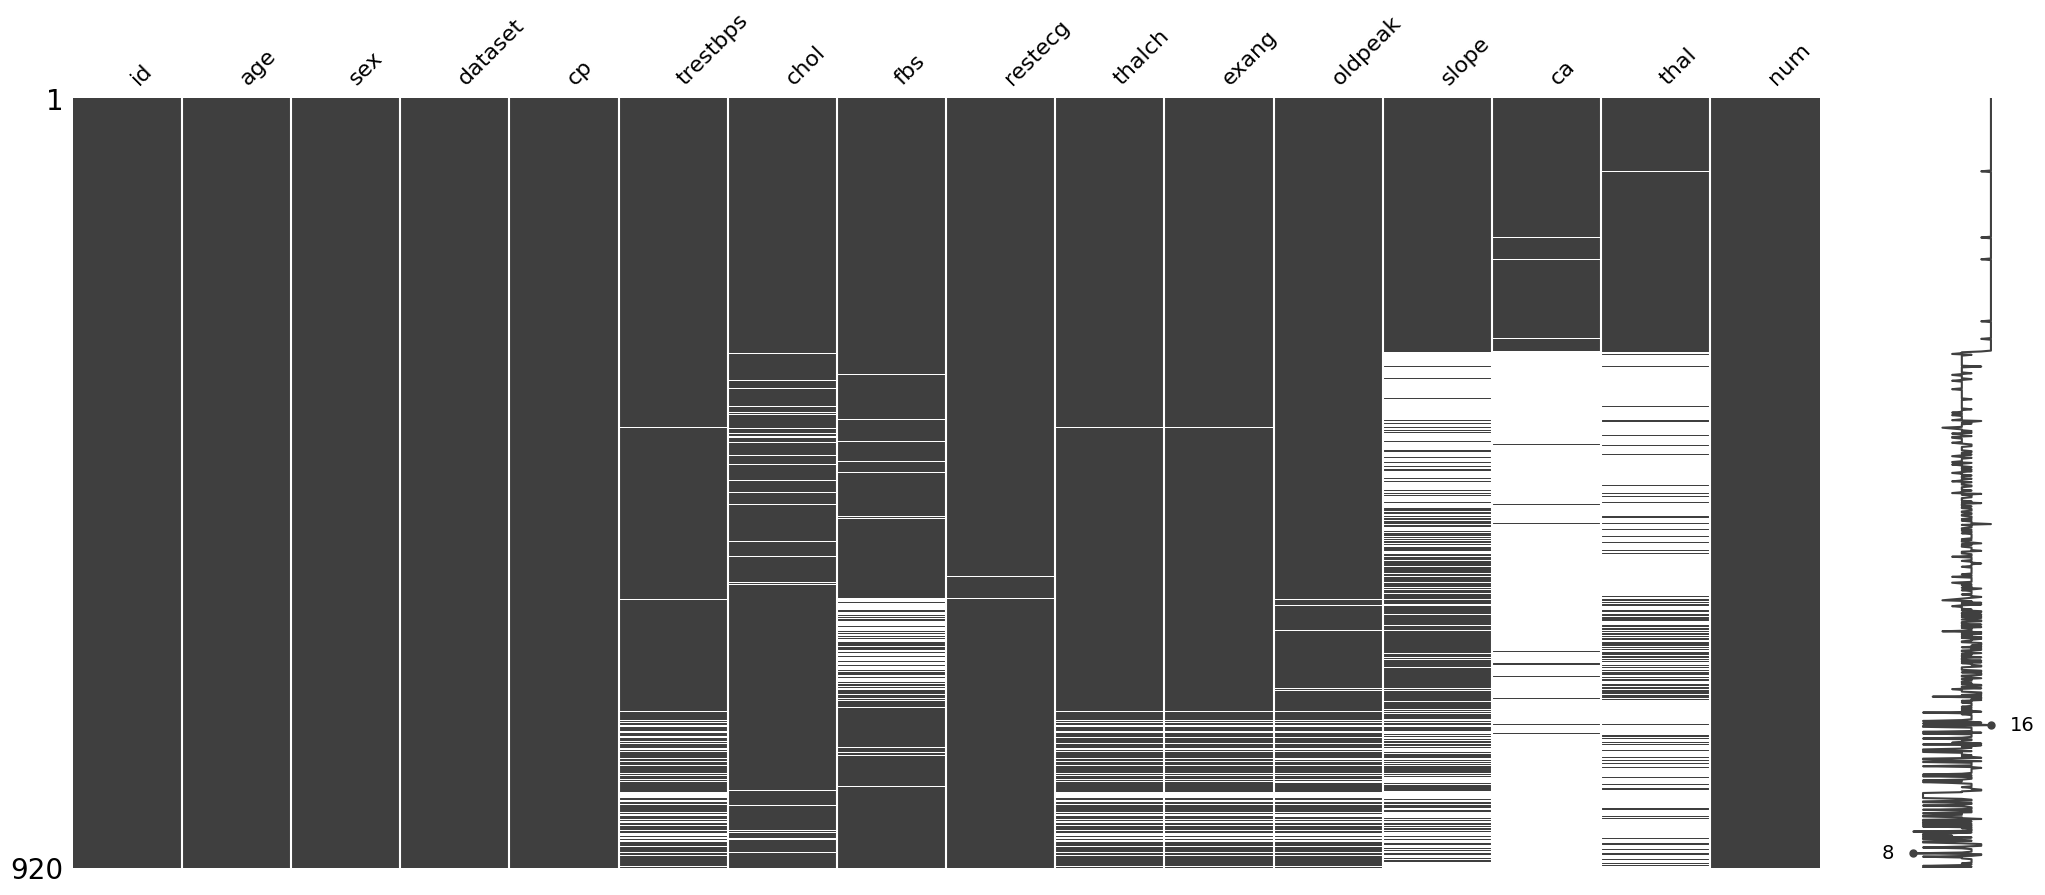

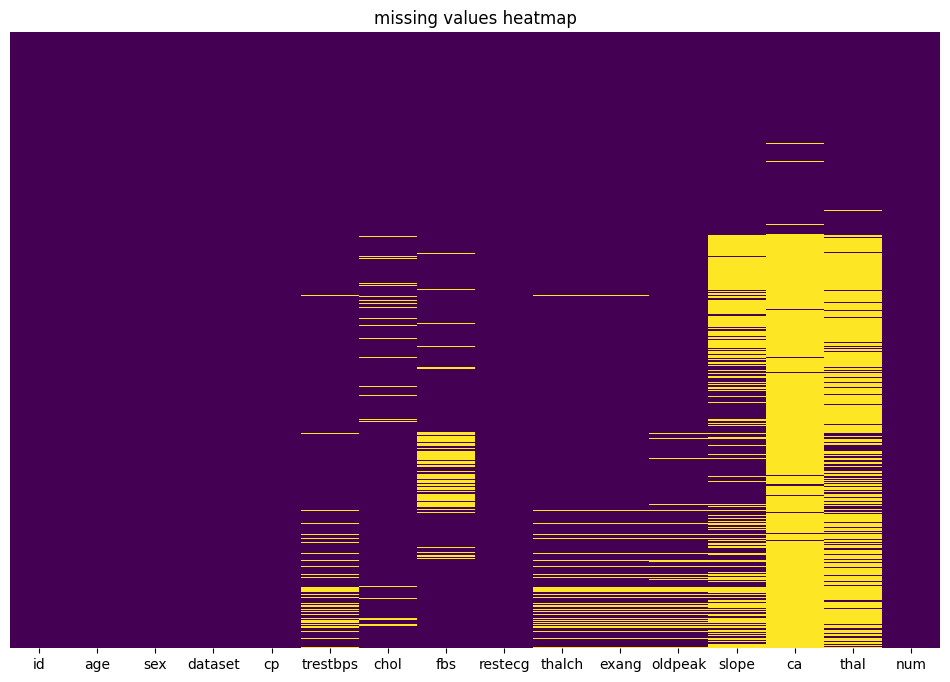

In [ ]:
 [ ] # visualizing the missing values

 # Missing matrix
 msno.matrix(df_clean)
 plt.show()

 # create a heatmap of missing values
 plt.figure(figsize=(12, 8))
 sns.heatmap(df.isnull(), cbar= False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
 plt.title('missing values heatmap')
 plt.show()

# 2 understanding your varibales

In [ ]:
# dataset columns
print("columns present in the dataset:\n")
print(df_clean.columns)

print ("\n data types of the columns of the dataset:")
print(df_clean.dtypes)

columns present in the dataset:

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

 data types of the columns of the dataset:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


# dataset describe

In [ ]:
print("Description of the Dataset:")
df_clean.describe()

Description of the Dataset:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# variable description

In [ ]:
[ ] # check unique values for each variables.
print("unique values in each columns of the dataset:\n")
print(df_clean.nunique())

unique values in each columns of the dataset:

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64


# 3. data wrangling

  1. Remove exact dulpicates

In [ ]:
print ("checking for duplicate rows...\n")
print ("duplicates found: ", df_clean.duplicated().sum())

df_clean = df_clean.drop_duplicates()
print ("duplicates after removing duplicates: ", df_clean.shape)

checking for duplicate rows...

duplicates found:  0
duplicates after removing duplicates:  (920, 16)


# 2. Fix inconsistent entries

In [ ]:
print("fixing inconsistent entries...")

# correct spelling issues in 'thal'
df_clean["thal"] = df_clean["thal"].replace("reversable defect", "reversible_defect")


fixing inconsistent entries...


# 3. Handle missing values

In [ ]:
print ("Handling missing values... \n")

# Numerical columns → median
num_cols = ["trestbps", "chol", "thalch", "oldpeak", "ca"]
for col in num_cols:
  df_clean[col] = df_clean[col].fillna(df_clean[col].median())
# Categorical columns → mode
cat_cols = ["fbs","restecg","exang", "slope", "thal"]
for col in cat_cols:
  df_clean[col] = df_clean[col]. fillna(df_clean[col].mode() [0])
print ("Missing values left:", df_clean.isnull().sum().sum())

Handling missing values... 

Missing values left: 0


# 4. Detect & treat outliers

In [ ]:
print ("Detecting and treating outliers...\n")
numeric_cols = df_clean.select_dtypes (include=[np. number]). columns. tolist()
for col in numeric_cols:
  Q1 = df_clean [col].quantile (0.25)
  Q3 = df_clean[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  median_val = df_clean[col].median()
  df_clean.loc[df_clean[col] < lower,col] = median_val
  df_clean. loc[df_clean[col]> upper, col] = median_val

Detecting and treating outliers...



# 5. Scaling & normalization

In [ ]:
print("Scaling numerical features... \n")
scale_cols = [col for col in numeric_cols if col not in ["id", "num"]]
scaler = MinMaxScaler ()
df_clean[scale_cols] = scaler. fit_transform(df_clean[scale_cols])

Scaling numerical features... 



# 6. Encoding categorical data

In [ ]:
print("Encoding categorical features...")
df_clean = pd. get_dummies (
    df_clean,
    columns= ["sex","dataset","cp", "fbs", "restecg", "exang", "slope", "thal"],
    drop_first=True
)

Encoding categorical features...


# 7. Feature engineering

In [ ]:
# Binary target column
df_clean ["heart _disease"] = (df_clean["num"] > 0). astype (int)

# Age group (Young, Middle-aged, Senior)
df_clean["age_group"] = pd.cut (
    df_clean["age"] * (df_clean["age"].max() - df_clean["age"].min()) + df_clean["age"]. min(),
    bins=[0, 40, 55, 100], labels=["Young", "Middle-aged", "Senior"]
)
df_clean = pd.get_dummies(df_clean, columns=["age_group"], drop_first=True)
# Cholesterol per Age ratio
df_clean["chol_per_age"] = (df_clean["chol"] * (df_clean["chol"].max() - df_clean["chol"].min()) + df_clean["chol"]. min()) / \
                           ((df_clean["age"] * (df_clean["age"].max() - df_clean["age"].min()) + df_clean["age"] .min()) + 1)
print ("New features added!")

New features added!


# Final processed Dataset

In [ ]:
print("Final dataset shape:", df_clean. shape)
df_clean. head ( )

Final dataset shape: (920, 31)


,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,...,heart _disease,age_group_Middle-aged,age_group_Senior,age_group_Middle-aged,age_group_Senior,age_group_Middle-aged,age_group_Senior,age_group_Middle-aged,age_group_Senior,chol_per_age
0,0.714286,0.679487,0.478964,0.614815,0.754386,0.0,True,False,False,False,...,0,False,False,False,False,False,False,False,False,0.279396
1,0.795918,0.871795,0.650485,0.303704,0.614035,0.0,True,False,False,False,...,1,False,False,False,False,False,False,False,False,0.362202
2,0.795918,0.358974,0.466019,0.459259,0.807018,0.0,True,False,False,False,...,1,False,False,False,False,False,False,False,False,0.259488
3,0.183673,0.487179,0.533981,0.888889,0.964912,0.0,True,False,False,False,...,0,False,False,False,False,False,False,False,False,0.451122
4,0.265306,0.487179,0.385113,0.777778,0.596491,0.0,False,False,False,False,...,0,False,False,False,False,False,False,False,False,0.304364


In [ ]:
print ("\nTarget distribution:")
df_clean ["heart _disease"].value_counts()


Target distribution:


,count
heart _disease,
1,509
0,411


In [ ]:
# Dataset rows & column count
num_rows, num_columns = df. shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns:{num_columns}')

Number of rows: 920
Number of columns:16


Index([False, True], dtype='bool', name='cp_typical angina')

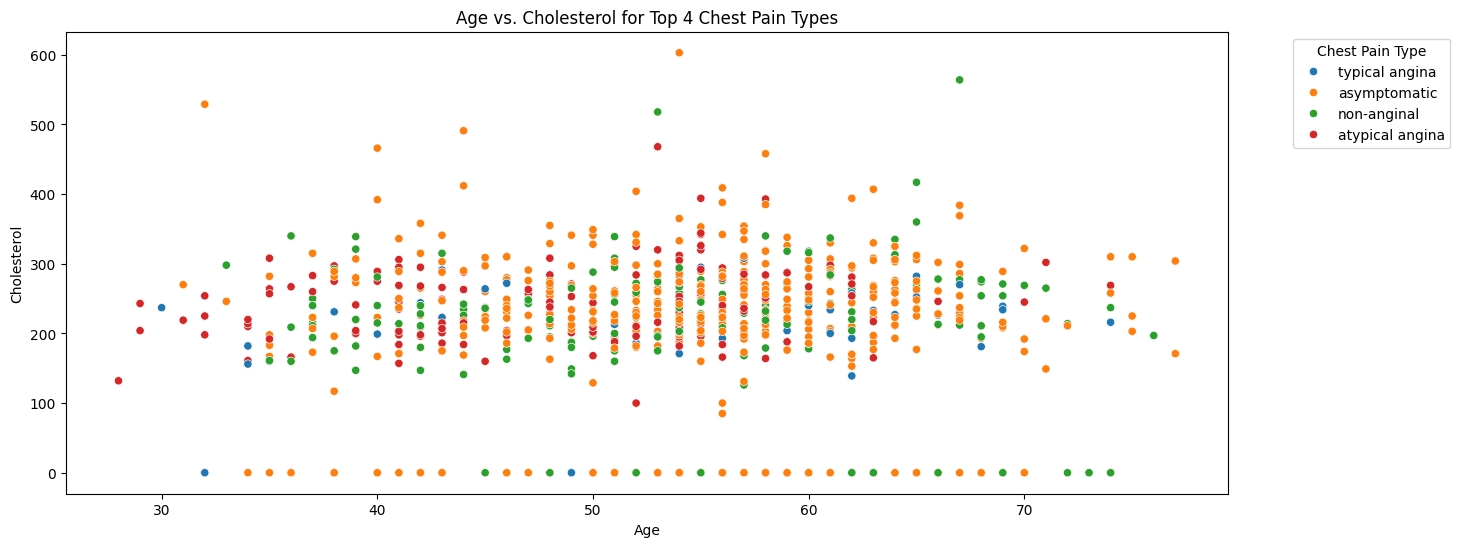

In [ ]:
top_leagues = df_clean['cp_typical angina'].value_counts().nlargest(4).index
display(top_leagues)

plt. figure(figsize=(15, 6))
sns. scatterplot(x='age', y='chol', data=df, hue= 'cp')
plt.title('Age vs. Cholesterol for Top 4 Chest Pain Types')
plt. xlabel ( 'Age')
plt.ylabel ('Cholesterol')

plt. legend(title='Chest Pain Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import plotly.express as px

fig = px. scatter(df, x='chol', y='age', color='sex')
fig.update_layout (width=1000, height=500)
fig. update_layout (title_text = 'Scatter Plot of Cholesterol vs. Age (colored by sex)')
fig.show()

In [ ]:
from plotly.offline import iplot

fig = px.box(x= df["age"],
labels={"x": "Age"},
title="5-Number-Summary (Box Plot) of Age")
iplot (fig)

In [ ]:
import plotly.express as px
# Clean oldpeak for bubble size
df['oldpeak_clean'] = df['oldpeak'].clip(lower=0). fillna(0)

fig = px. scatter (
    df,
    x='chol',
    y='age',
    color='cp',
    size='oldpeak_clean',
    size_max=30,
    hover_name= 'exang'
)
fig.update_layout (width=1000, height=500)
fig.update_layout (title_text='<b>Scatter Plot of Cholesterol vs. Age</b>')
fig.show()

In [ ]:
import plotly. express as px
# Clean the 'ca'column for bubble size
df['ca_clean'] = df['ca']. fillna(0)

fig = px. scatter (
    data_frame=df,
    x="age",
    y="chol",
    color="cp",
    size="ca_clean",  # use the cleaned column
    hover_data=['oldpeak' ]
)
fig.update_layout (
    title_text="<b>Cholesterol Vs Age</b>",
    titlefont= {'size': 24, 'family': 'Serif'},
    width=1000,
    height=500
)
fig.show()

In [ ]:
import plotly.express as px
# Keep only valid size values
df_clean = df[df[ 'oldpeak' ]. notna() & (df[ 'oldpeak' ] >= 0)]
fig = px.scatter (
    df_clean,
    x= 'chol',
    y= 'age',
    color= 'cp',
    size='oldpeak',
    size_max=30,
    hover_name= 'exang',
    facet_col= 'cp'
   )
fig.update_layout (
     width=1000,
     height=500,
     title_text='Scatter Plot of Cholesterol vs. Age (colored by cp)',
     title_x=0.5
)
fig. show()


In [ ]:
fig = px.bar(df,x='age', y='chol',hover_data=['oldpeak'],color='sex',height=400)
fig.show()

In [ ]:
def generate_rating_df(df):
  rating_df = df. groupby(['cp','slope']).agg({'id': 'count'}). reset_index()
  rating_df = rating_df[rating_df['id'] != 0]
  rating_df.columns = [' cp','slope','count']
  rating_df = rating_df.sort_values ('slope')
  return rating_df

rating_df = generate_rating_df(df)
fig = px. bar(rating_df, x=' cp', y='count', color='slope')
fig.update_traces(textposition='auto',
textfont_size=20)
fig.update_layout (barmode='stack')

In [ ]:
from google.colab import drive
import pandas as pd
import plotly.express as px

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file (adjust if needed)
file_path = '/content/drive/MyDrive/project/heart_disease_uci.csv'

# Read CSV
df = pd.read_csv(file_path)

def generate_rating_df(df):
  rating_df= df.groupby(['cp', 'slope']) .agg({'id' : 'count'}).reset_index()
  rating_df= rating_df[rating_df['id'] != 0]
  rating_df.columns = ['cp', 'slope', 'counts']
  rating_df= rating_df.sort_values('slope')
  return rating_df

rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='cp', y='counts', color='slope' , barmode='group' ,
                         text='counts' ,
                         )
fig. update_traces(textposition='auto',
                   textfont_size=20)
fig.show()

Mounted at /content/drive


In [ ]:
def generate_rating_df(df):
  rating_df = df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
  rating_df = rating_df[rating_df['id'] != 0]
  rating_df.columns = ['cp', 'slope', 'counts']
  rating_df = rating_df.sort_values('slope')
  # Calculate percentages
  total_counts = rating_df['counts'].sum()
  rating_df['percentage'] = rating_df['counts'] / total_counts * 100
  return rating_df

rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='cp', y='counts', color='slope',
                         text='percentage')
fig.update_traces(
texttemplate='%{text:.1f}%',
textposition='outside', textfont_size=16
)
fig.update_layout (
barmode='group', yaxis_title='Count',
xaxis_title='CP',
legend_title='Slope'
)
fig.update_layout (
height=550, width=1000,
title_text="Distribution of Chest Pain Type by percentage" ,
                    title_font_size=24)
fig.show()

In [ ]:
import plotly.express as px
# Remove rows where 'ca' is NaN
df_clean = df[df['ca']. notna()]
fig = px.scatter(
data_frame=df_clean,
x="age",
y="chol",
color="cp", size='ca', hover_data=['oldpeak'],
marginal_x="histogram", marginal_y="box")
fig.update_layout (
title_text="<b>Age vs Cholesterol</b>", titlefont={'size': 24, 'family': 'serif'}, width=1000, height=550)
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is your DataFrame
asymptomatic = df[df[ 'cp'] == 'asymptomatic']
non_anginal = df[df[ 'cp'] == 'non-anginal']
atypical_angina = df[df['cp'] == 'atypical angina']
typical_angina = df[df[ 'cp'] == 'typical angina']

# Create 2x2 subplot for pie charts
fig = make_subplots (
    rows=2, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=("Asymptomatic", "Non-Anginal",
                    "Atypical Angina", "Typical Angina")
)

# Add pie charts
fig.add_trace(go.Pie(labels=asymptomatic["thal"], values=asymptomatic["chol"], name="asymptomatic"), row=1, col=1)
fig.add_trace(go.Pie(labels=non_anginal["thal"], values=non_anginal ["chol"], name="non_anginal"), row=1, col=2)
fig.add_trace(go.Pie(labels=atypical_angina["thal"], values=atypical_angina["chol"], name="atypical_angina"), row=2, col=1)
fig.add_trace(go.Pie(labels=typical_angina["thal"], values=typical_angina["chol"], name="typical_angina"), row=2, col=2)

# Update layout to increase size and add main title
fig.update_layout (
    height=800, width=1000,
    title_text="Distribution of Cholesterol Levels by Chest Pain Type",
    title_font_size=24
)

# Update traces
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=16)

# Update annotations (if needed)
fig.update_annotations (font_size=16)
fig.show()

In [ ]:
import plotly.express as px
# Remove rows where 'ca' is NaN
df_clean = df[df['ca']. notna()]
fig = px.scatter(
data_frame=df_clean,
x="age",
y="chol",
size="ca", size_max=30, color="sex", trendline="ols", trendline_scope="overall",
                   trendline_color_override="black"
)
fig.update_layout (
title_text="<b>Chest Pain vs Gender</b>", titlefont={'size': 24, 'family': 'Serif'}, width=1000, height=550,
                    )
fig. show()

In [ ]:
import plotly.express as px
# Drop NaN values from 'ca'
df_clean = df. dropna(subset=['ca'])
fig = px. scatter(
data_frame=df_clean, x="age", y="chol",
size="ca", size_max=30, color="sex", trendline="ols")
fig.update_layout (
title_text="<b>Age vs Cholesterol</b>", titlefont={'size': 24, 'family': 'Serif'}, width=1000, height=500,
)
fig. show()

In [ ]:
import plotly.express as px
from plotly.offline import iplot
# Count frequency of chest pain types
category = df["cp"]. value_counts ()
# Create bar chart
fig = px. bar (
x=category.index,
y=(category / sum(category)) * 100,
# convert to percentage
color=category.index,
labels={"x": "Chest Pain Type", "y": "Frequency (%) "}, title="Frequency of Chest Pain Categories in Percentage", text=[f"{(x / sum(category)) * 100:.1f}%" for x in category], template="plotly_dark"
)
# Remove legend since colors already show categories
fig. update_layout (showlegend=False)
# Beautify text labels
fig.update_traces(
textfont= {
"family": "consolas",
"size": 20
})
iplot (fig)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming a DataFrame named 'df' is loaded with the heart disease data
# df = pd.read_csv('heart_disease.csv')

# Preprocessing the data
df['thal'] = df['thal'].astype(str)
df_clean = df[df['thal'] != 'nan']

# Define the chest pain types to plot
cp_types = df_clean['cp'].unique()
titles = [f'Thalassemia for {cp_type}' for cp_type in cp_types]

# Create a 2x2 grid of subplots for the pie charts
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=titles,
    specs=[[{'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}]]
)

# Add each pie chart to its respective subplot
for i, cp_type in enumerate(cp_types):
    row = (i // 2) + 1
    col = (i % 2) + 1

    cp_data = df_clean[df_clean['cp'] == cp_type]
    thal_counts = cp_data['thal'].value_counts()

    fig.add_trace(
        go.Pie(
            labels=thal_counts.index,
            values=thal_counts.values,
            name=cp_type
        ),
        row=row, col=col
    )

# Update layout for a cleaner look
fig.update_traces(
    hoverinfo="label+percent+name",
    textinfo='percent+label',
    textposition='inside'
)
fig.update_layout(
    title_text='Distribution of Thalassemia by Chest Pain Type',
    height=800,
    width=800
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
# Group data by cp and thal
grouped_df = df.groupby(['cp',
'thal']).size().reset_index(name='count')
# Stacked bar chart
fig = px.bar(
grouped_df, y="cp",
# chest pain type
x="count",
# count of patients
color="thal",
# stacked by thal
title="Count of Patients by Chest Pain Type and Thalassemia",
             labels={'count': 'Number of Patients', 'cp': 'Chest Pain Type', 'thal': 'Thalassemia'}, text="count"
)
# Set
# stacked mode
fig.update_layout (
barmode="stack", width=950, height=500)
fig.show()

In [ ]:
import plotly. figure_factory as ff
# Function to format the title and subtitle
def format_title(title, subtitle=None, subtitle_font=None, subtitle_font_size=None) :
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-family:{subtitle_font}; font-size:{subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br> {subtitle}'

# Prepare data (counts of 'chol' grouped by cp & thal)
heatmap_data = df. groupby(['cp', 'thal']). chol.size ().unstack()
z = heatmap_data. values.tolist() # heatmap values
x = heatmap_data.columns.tolist() # columns (thal)
y = heatmap_data.index.tolist()   # rows (cp)
# Create annotated heatmap
fig = ff. create_annotated_heatmap (
z=z,
x=x,
y=y,
xgap=3,
ygap=3,
colorscale=['#53354A',
'#E84545']
# custom dark red palette
)
# Title with subtitle
title = format_title(
"Chest Pain (cp)",         # main title
"vs Thalassemia (thal)",   # subtitle
"Arial",                    # subtitle font
12                         # subtitle font size
)
# Update layout for better visuals
fig. update_layout (
title_text=title, title_x=0.5, titlefont={'size': 24,
'family': 'Arial'},
template='plotly_dark', paper_bgcolor='#2B2E4A',
plot_bgcolor='#2B2E4A',
xaxis={'side': 'bottom'},
                      xaxis_showgrid=False,
yaxis_showgrid=False,
yaxis_autorange= 'reversed'
)
fig. show()

In [ ]:
fig = px. sunburst(
df,
path=['cp',
'sex'],
# hierarchy levels
color='cp',
# optional: color by cp
title="Chest Pain vs Gender"
)
# Layout formatting
fig.update_layout (
title_text="<b>Chest Pain vs Gender</b>", titlefont={'size': 24,
'family': 'Serif'},
width=750, height=750, template="plotly_dark"
# optional: dark theme
)
fig. show()

/tmp/ipython-input-3895363990.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




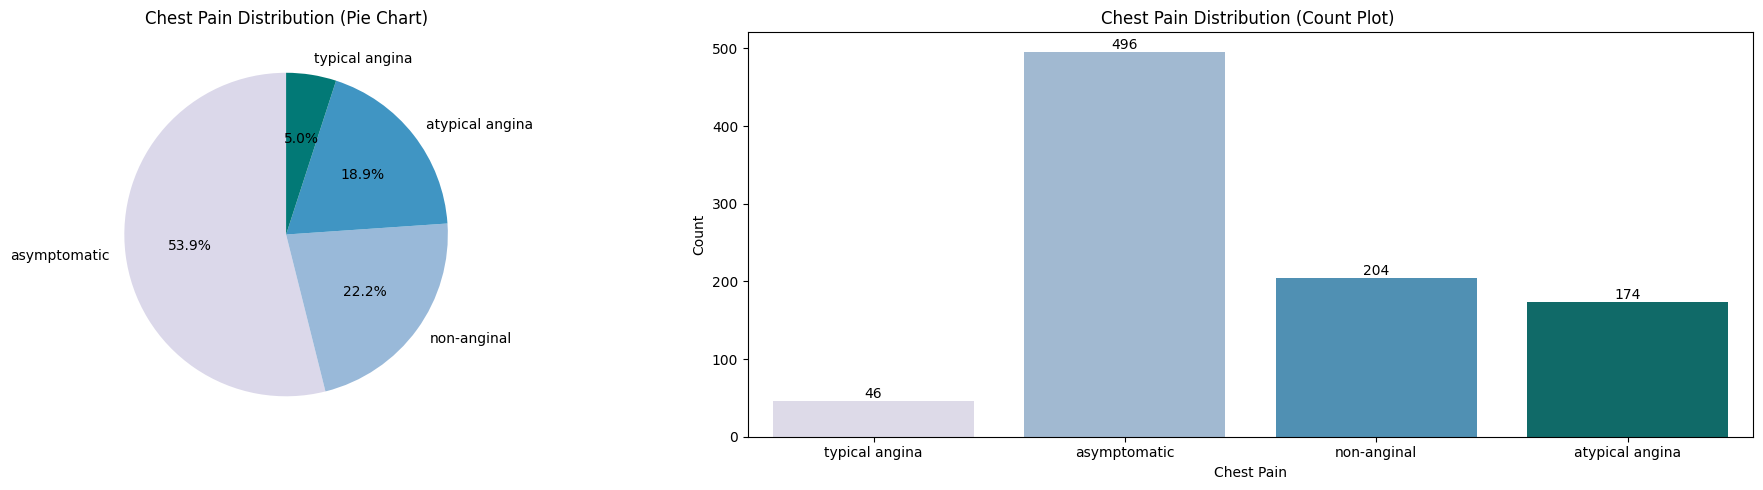

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set figure size
plt. figure(figsize=(20, 5))
# Pie Chart
plt. subplot (1, 2, 1)
quality_counts = df[ 'cp']. value_counts()
plt.pie(
    quality_counts, labels=quality_counts.index,
colors=sns.color_palette('PuBuGn', len(quality_counts) ),
autopct='%1.1f%%' ,        # shwo percentage
startangle=90,             # makes chart start at top
)
plt.title('Chest Pain Distribution (Pie Chart)')
# Count Plot (Bar Chart)
plt. subplot (1, 2, 2)
ax = sns. countplot (data=df, x='cp', palette= 'PuBuGn')
# Add count values above each bar
for container in ax. containers:
    ax. bar_label(container, label_type='edge')
plt.title( 'Chest Pain Distribution (Count Plot) ')
plt.xlabel( 'Chest Pain')
plt.ylabel('Count')
# Adjust layout
plt.tight_layout()
plt. show()

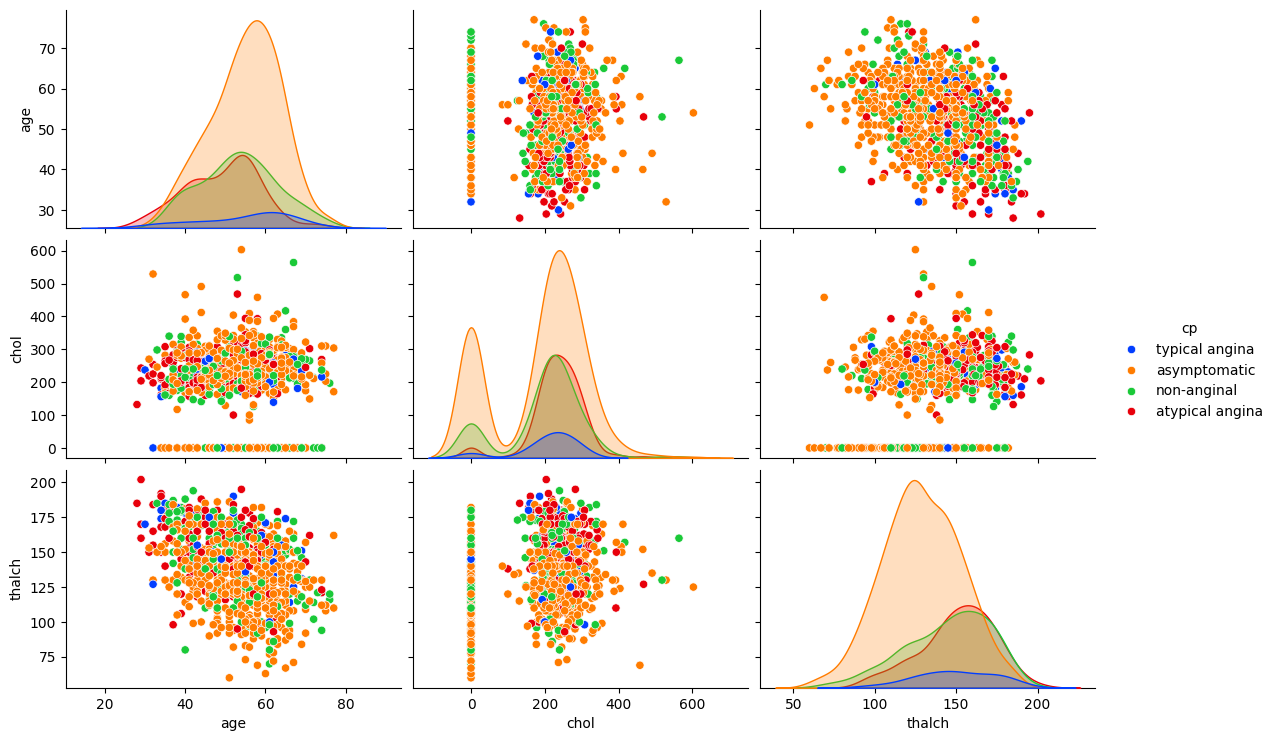

In [ ]:
sns. pairplot(df[['cp', 'age', 'chol', 'thalch']], hue='cp', aspect=1.5,dropna=True,palette='bright')
plt.show()